In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")


In [3]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print("Shape:", netflix.shape)
print("\nInfo:")
print(netflix.info())
print("\nDescribe:")
print(netflix.describe(include='all'))


Shape: (8807, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Describe:
       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Di

In [7]:
netflix.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
netflix['duration_minutes'] = netflix['duration'].str.extract(r'(\d+)').astype(float)



In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8807 non-null   object 
 1   type              8807 non-null   object 
 2   title             8807 non-null   object 
 3   director          6173 non-null   object 
 4   cast              7982 non-null   object 
 5   country           7976 non-null   object 
 6   date_added        8797 non-null   object 
 7   release_year      8807 non-null   int64  
 8   rating            8803 non-null   object 
 9   duration          8804 non-null   object 
 10  listed_in         8807 non-null   object 
 11  description       8807 non-null   object 
 12  duration_minutes  8804 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


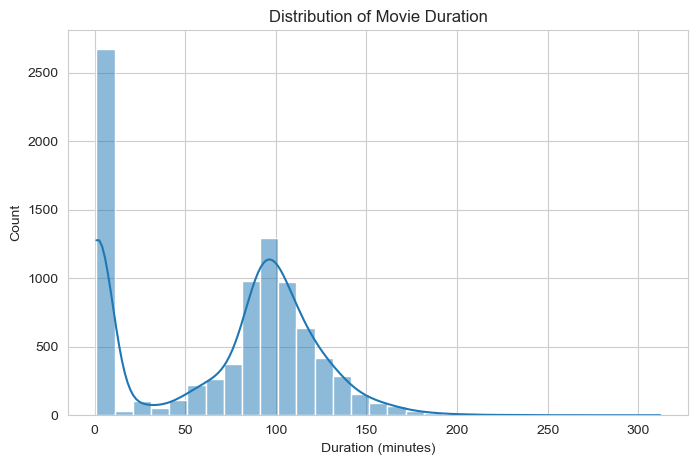

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(netflix['duration_minutes'], kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.show()


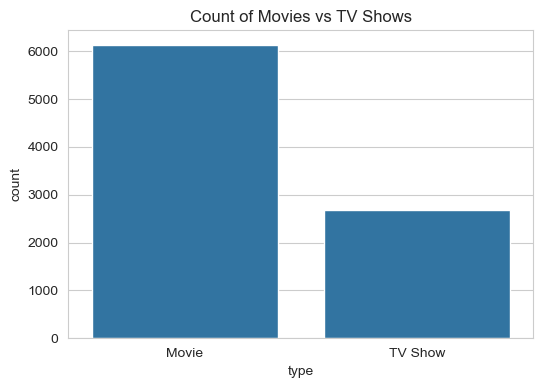

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=netflix)
plt.title("Count of Movies vs TV Shows")
plt.show()


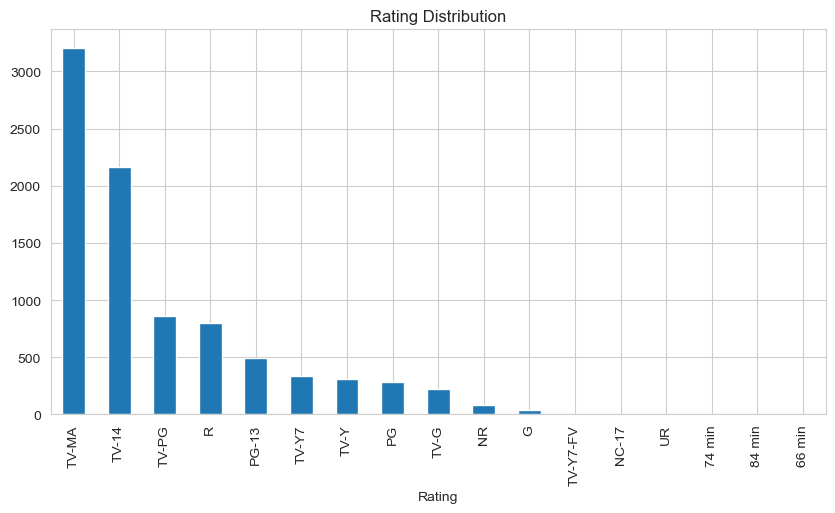

In [19]:
plt.figure(figsize=(10,5))
netflix['rating'].value_counts().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.show()


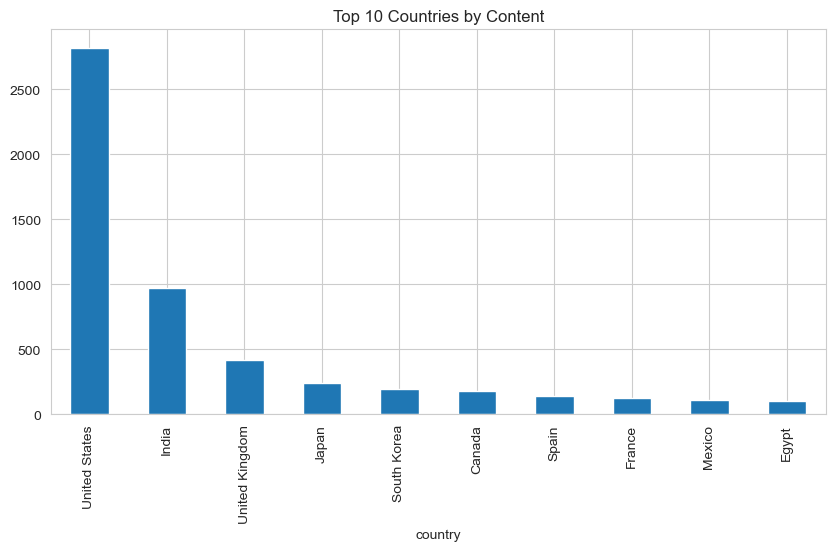

In [21]:
top_countries = netflix['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Content")
plt.show()


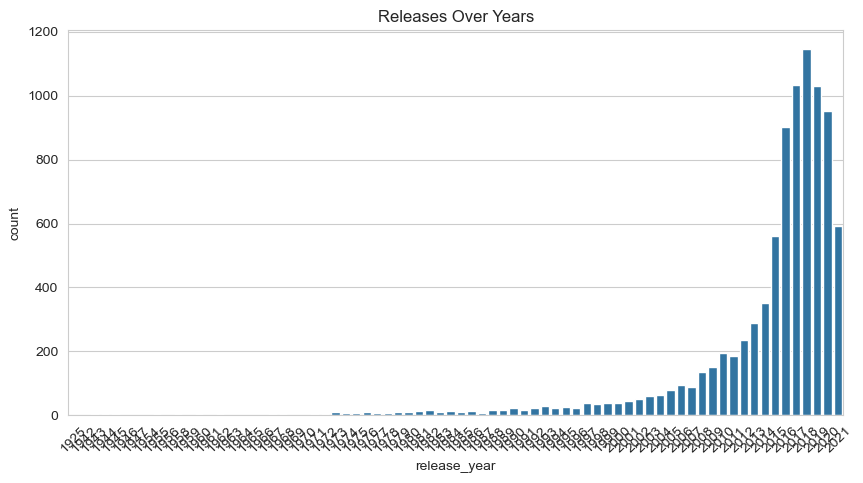

In [29]:
#TIME-BASED ANALYSIS
plt.figure(figsize=(10,5))
sns.countplot(x='release_year', data=netflix, order=sorted(netflix['release_year'].unique()))
plt.xticks(rotation=45)
plt.title("Releases Over Years")
plt.show()


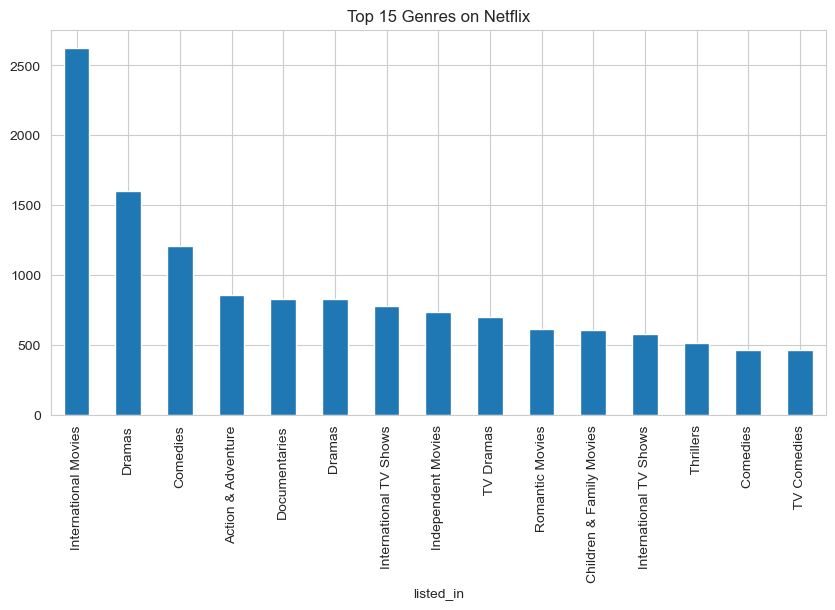

In [31]:
#TEXT FEATURE ANALYSIS
genres = netflix['listed_in'].str.split(',').explode().value_counts().head(15)
genres.plot(kind='bar', figsize=(10,5), title="Top 15 Genres on Netflix")
plt.show()


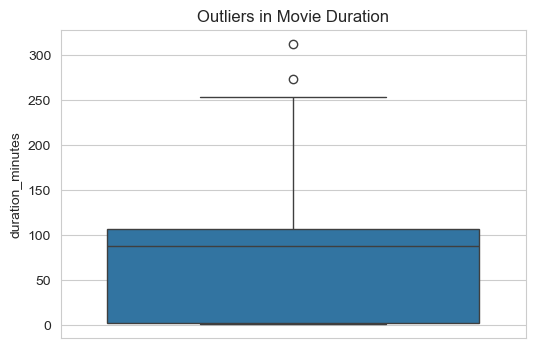

In [33]:
#OUTLIER DETECTION
plt.figure(figsize=(6,4))
sns.boxplot(y=netflix['duration_minutes'])
plt.title("Outliers in Movie Duration")
plt.show()


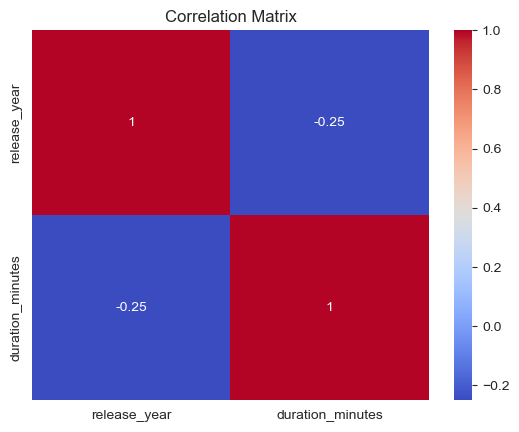

In [35]:
#CORRELATION
corr = netflix[['release_year','duration_minutes']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#INSIGHTS
• Netflix has more Movies than TV Shows.
• Most content is released after 2016, showing rapid growth.
• 'TV-MA' is the most frequent rating.
• USA and India contribute the most content.
• Common genres include Drama, Comedy, and International TV Shows.
• Movie durations are generally between 80–120 mins, with some outliers.


#CONCLUSION
EDA reveals that Netflix's catalog is dominated by recent releases and mature-rated content.
Genre distribution shows a global preference for drama and comedy.
Duration outliers indicate the presence of documentaries and special features.
